In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/los-angeles-crime-dataset-2020-present/Crime_Data_from_2020_to_Present.csv


In [2]:
crime=pd.read_csv("/kaggle/input/los-angeles-crime-dataset-2020-present/Crime_Data_from_2020_to_Present.csv")
crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752906,231510379,05/29/2023 12:00:00 AM,05/25/2023 12:00:00 AM,1100,15,N Hollywood,1548,2,662,"BUNCO, GRAND THEFT",...,IC,Invest Cont,662.0,NaN,NaN,NaN,5300 DENNY AV,NaN,34.1667,-118.3643
752907,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054
752908,231606525,03/22/2023 12:00:00 AM,03/22/2023 12:00:00 AM,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
752909,231210064,04/12/2023 12:00:00 AM,04/12/2023 12:00:00 AM,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

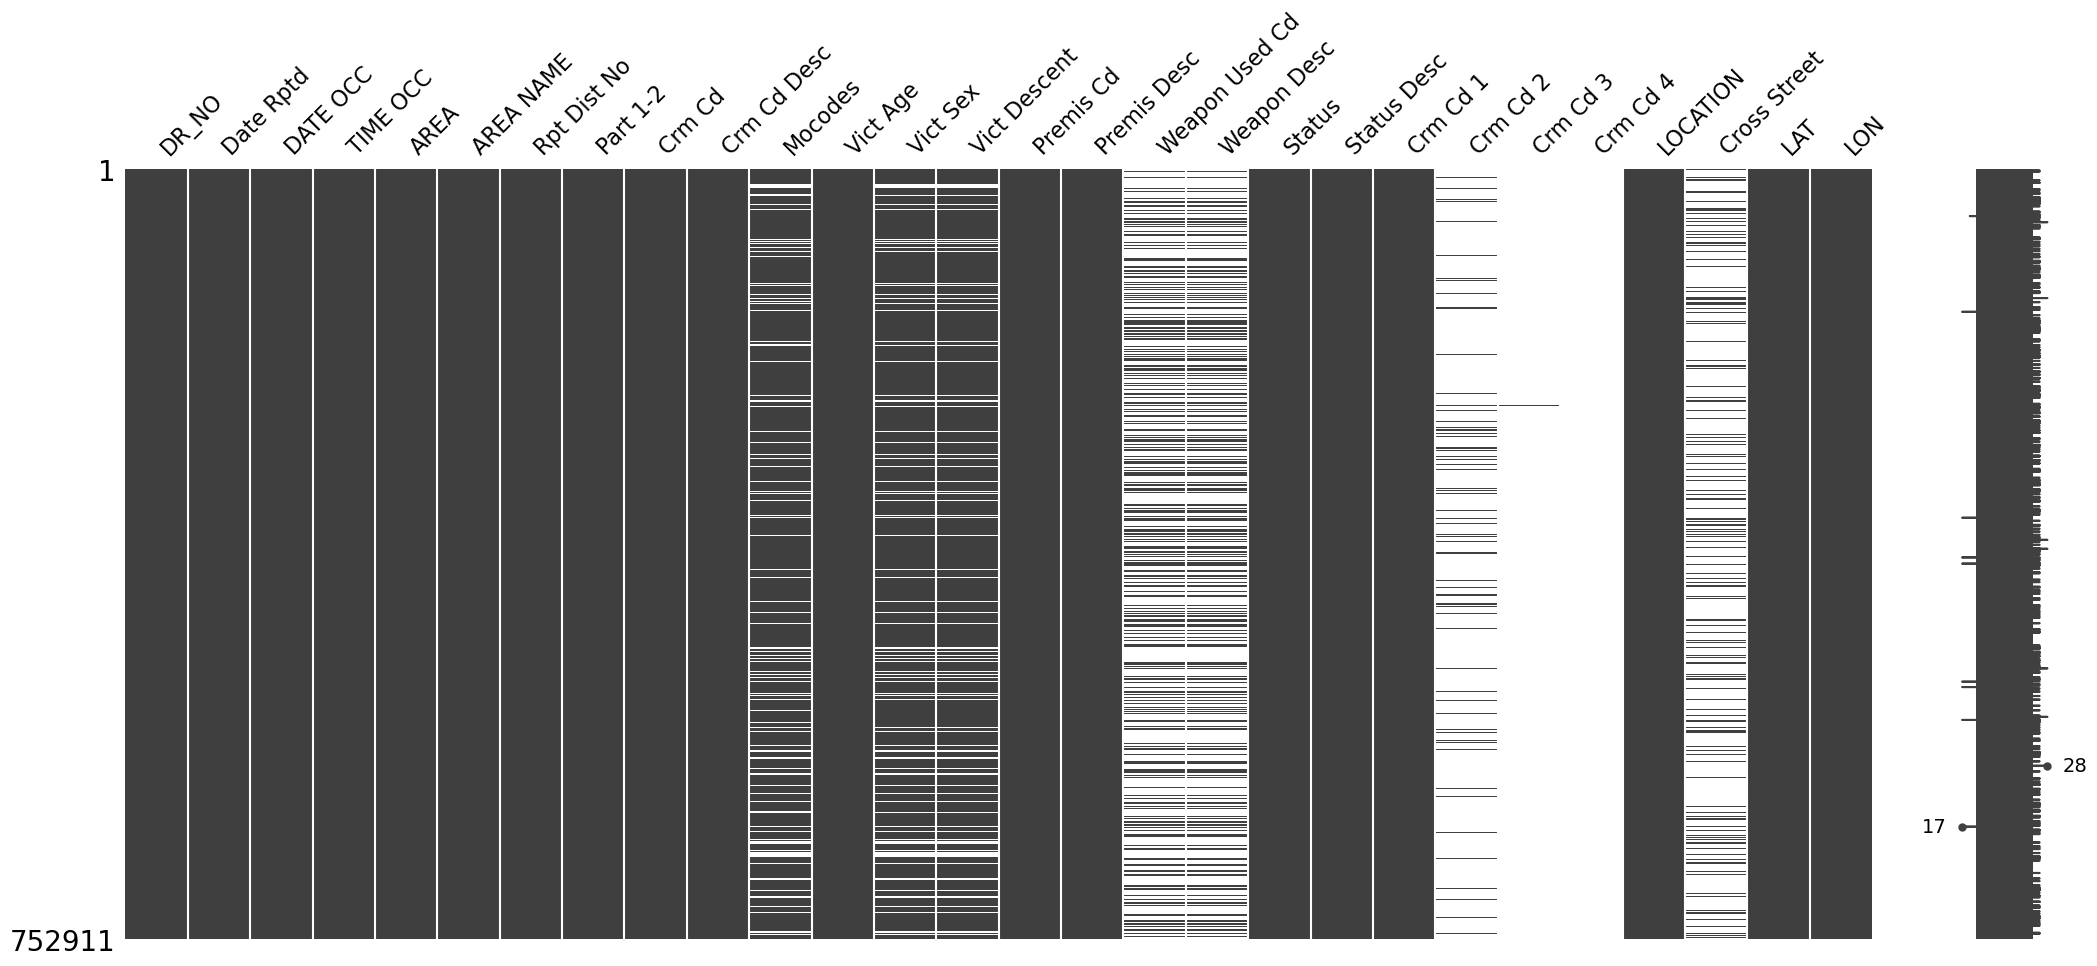

In [3]:
import missingno as msno  # checking for missing values
msno.matrix(crime)

# **EDA**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows of the dataset
print(crime.head())

# Get summary statistics of numerical columns
print(crime.describe())

# Check the data types and missing values in the dataset
print(crime.info())


       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFEN

# **Data cleaning**

In [5]:
# Check for missing values in each column
print(crime.isnull().sum())

# Drop rows with missing values (if required)
crime.dropna(inplace=True)

# Check for duplicate rows
print(crime.duplicated().sum())

# Drop duplicate rows (if required)
crime.drop_duplicates(inplace=True)


DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           103261
Vict Age               0
Vict Sex           98230
Vict Descent       98236
Premis Cd              9
Premis Desc          435
Weapon Used Cd    491439
Weapon Desc       491439
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          697204
Crm Cd 3          751044
Crm Cd 4          752855
LOCATION               0
Cross Street      631859
LAT                    0
LON                    0
dtype: int64
0


# **Crime Frequency Analysis**

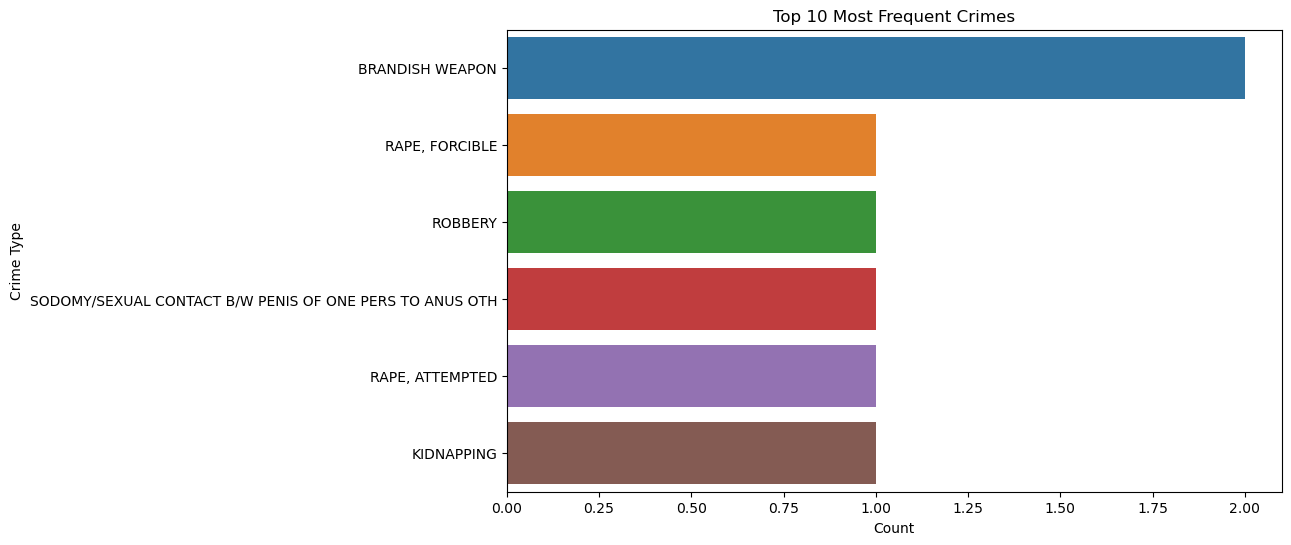

In [6]:
# Count the occurrences of each crime type (Crm Cd Desc)
crime_counts = crime['Crm Cd Desc'].value_counts()

# Plot the top 10 most frequent crimes
plt.figure(figsize=(10, 6))
sns.barplot(x=crime_counts.head(10).values, y=crime_counts.head(10).index)
plt.xlabel('Count')
plt.ylabel('Crime Type')
plt.title('Top 10 Most Frequent Crimes')
plt.show()


# **Time Series Analysis**

In [7]:
print(crime.columns)

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


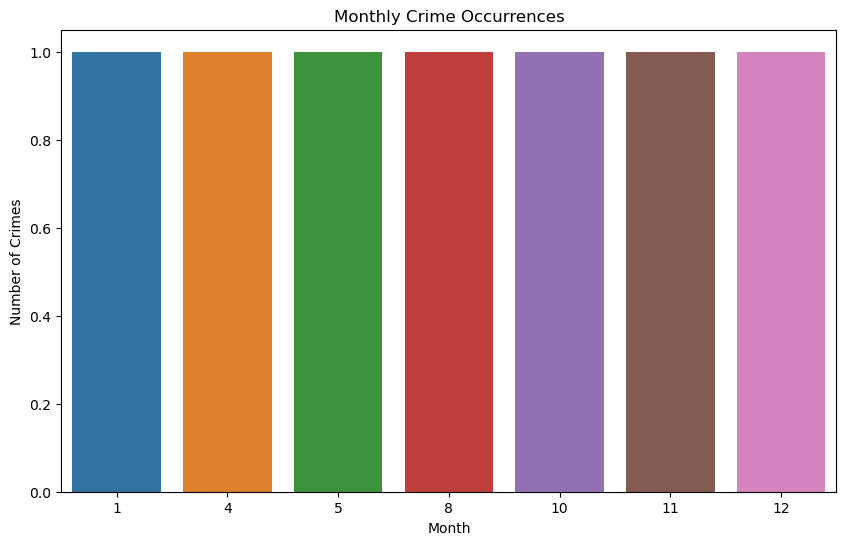

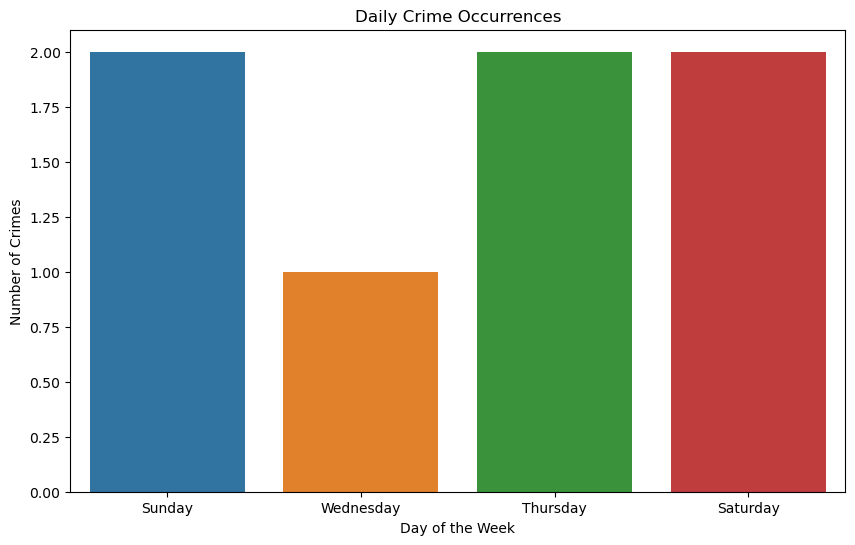

In [8]:
# Convert 'DATE OCC' column to datetime format
crime['DATE OCC'] = pd.to_datetime(crime['DATE OCC'])

# Extract month and day of the week information
crime['Month'] = crime['DATE OCC'].dt.month
crime['Day of Week'] = crime['DATE OCC'].dt.day_name()

# Plot crime occurrences by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=crime)
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Monthly Crime Occurrences')
plt.show()

# Plot crime occurrences by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', data=crime)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.title('Daily Crime Occurrences')
plt.show()


# **Crime Mapping**

In [9]:
import folium

# Create a map centered at a specific location (e.g., Los Angeles)
crime_map = folium.Map(location=[34.0522, -118.2437], zoom_start=12)

# Add crime locations as markers on the map
for index, row in crime.iterrows():
    folium.Marker(location=[row['LAT'], row['LON']], popup=row['Crm Cd Desc']).add_to(crime_map)

# Display the map
crime_map.save('crime_map.html')  # Save the map as an HTML file
crime_map


In [10]:
crime

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,Month,Day of Week
52007,200613424,08/02/2020 12:00:00 AM,2020-08-02,2030,6,Hollywood,657,1,761,BRANDISH WEAPON,...,761.0,920.0,930.0,998.0,WESTERN,ROMAINE,34.0885,-118.3092,8,Sunday
126196,201904032,01/02/2020 12:00:00 AM,2020-01-01,2135,19,Mission,1924,1,761,BRANDISH WEAPON,...,761.0,930.0,997.0,998.0,ASTORIA ST,SAN FERNANDO RD,34.2949,-118.4571,1,Wednesday
362633,210617136,10/08/2021 12:00:00 AM,2021-10-07,1950,6,Hollywood,659,1,121,"RAPE, FORCIBLE",...,121.0,210.0,910.0,998.0,NORMANDIE,DE LONGPRE,34.0966,-118.3005,10,Thursday
371379,210209196,05/08/2021 12:00:00 AM,2021-05-08,230,2,Rampart,279,1,210,ROBBERY,...,210.0,510.0,910.0,998.0,JAMES M WOOD,GREEN,34.0503,-118.2720,5,Saturday
488257,220600626,04/27/2022 12:00:00 AM,2022-04-23,2300,6,Hollywood,646,1,821,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...,...,230.0,821.0,910.0,998.0,SELMA,LAS PALMAS,34.0997,-118.3363,4,Saturday
535727,221718232,12/25/2022 12:00:00 AM,2022-12-25,1150,17,Devonshire,1797,1,122,"RAPE, ATTEMPTED",...,122.0,230.0,910.0,998.0,PARTHENIA ST,HAYVENHURST,34.2285,-118.4939,12,Sunday
583541,221401314,11/10/2022 12:00:00 AM,2022-11-10,2117,14,Pacific,1452,2,910,KIDNAPPING,...,812.0,860.0,910.0,998.0,WASHINGTON,SPEEDWAY,33.9792,-118.4666,11,Thursday


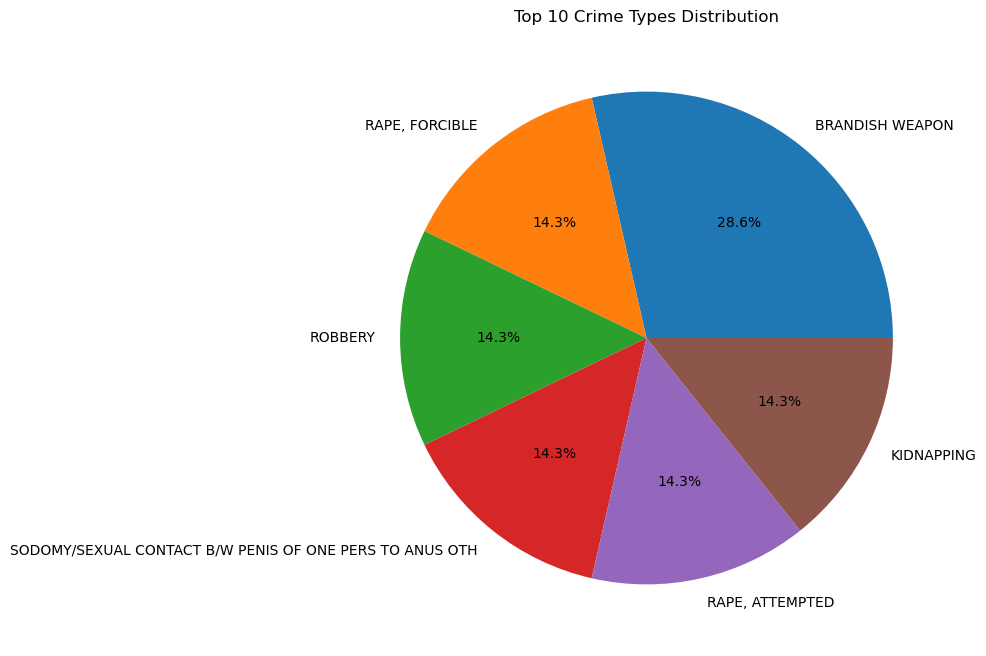

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the crime dataset (assuming you have already loaded it)
# crime = pd.read_csv('crime.csv')

# Step 1: Crime Type Distribution - Pie Chart
crime_type_counts = crime['Crm Cd Desc'].value_counts()
top_10_crime_types = crime_type_counts.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_crime_types, labels=top_10_crime_types.index, autopct='%1.1f%%')
plt.title('Top 10 Crime Types Distribution')
plt.show()



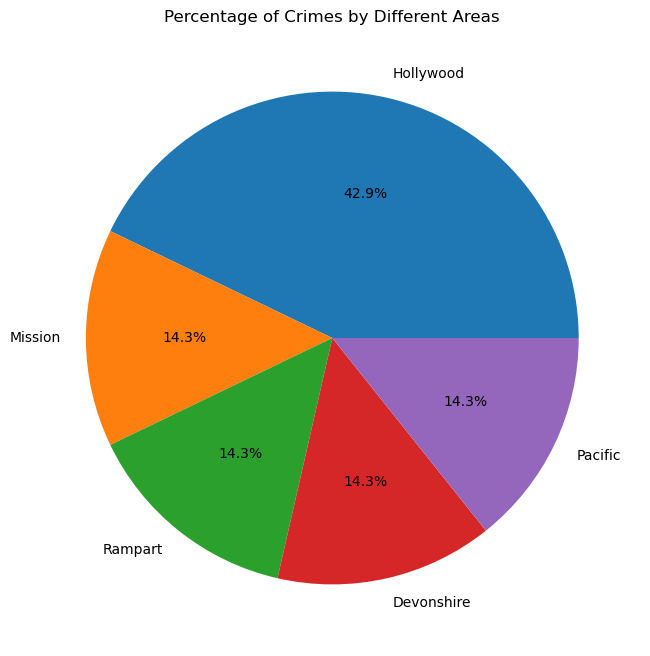

In [12]:
# Step 2: Crimes by Different Areas - Pie Chart
crime_area_counts = crime['AREA NAME'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(crime_area_counts, labels=crime_area_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Crimes by Different Areas')
plt.show()


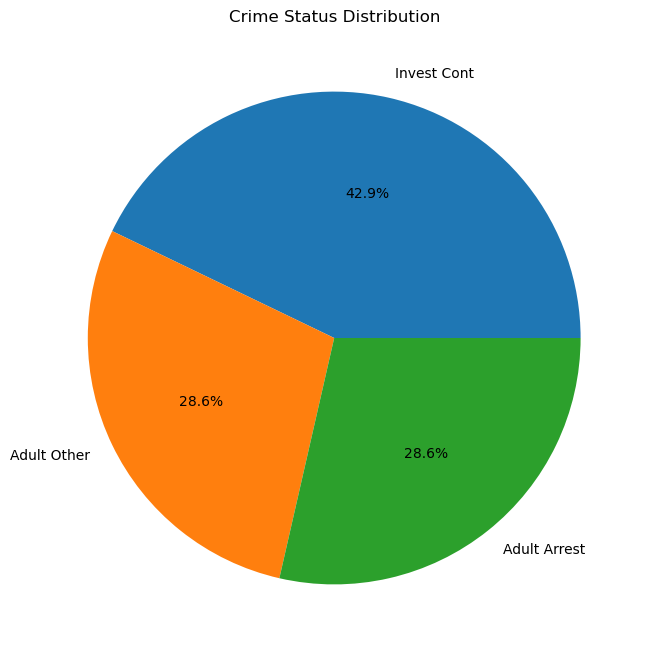

In [13]:
# 1: Crime Status Distribution - Pie Chart
crime_status_counts = crime['Status Desc'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(crime_status_counts, labels=crime_status_counts.index, autopct='%1.1f%%')
plt.title('Crime Status Distribution')
plt.show()


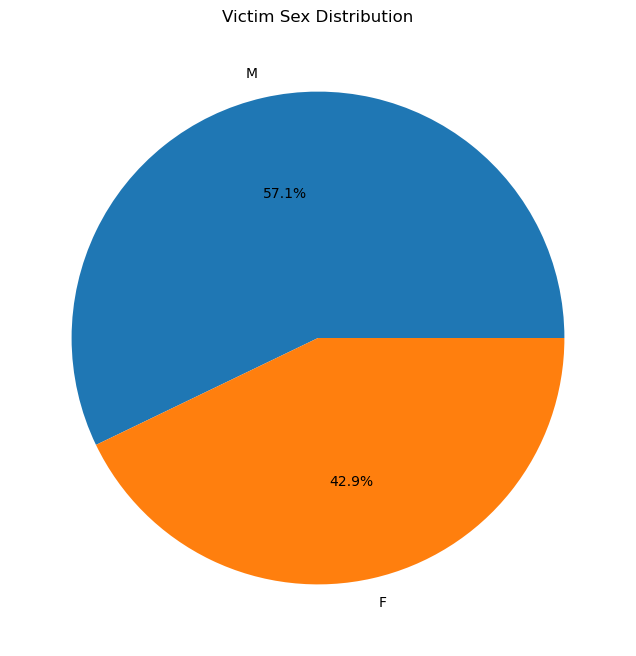

In [14]:
#  2: Victim Sex Distribution - Pie Chart
victim_sex_counts = crime['Vict Sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(victim_sex_counts, labels=victim_sex_counts.index, autopct='%1.1f%%')
plt.title('Victim Sex Distribution')
plt.show()

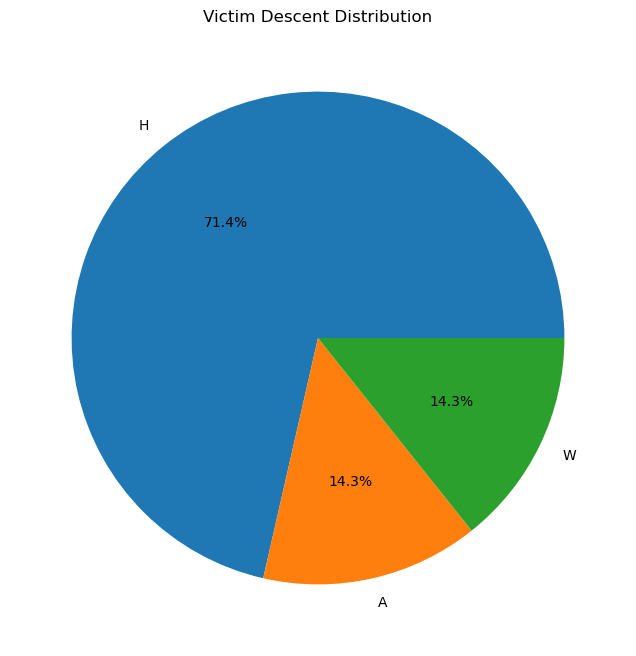

In [15]:
# 3: Victim Descent Distribution - Pie Chart
victim_descent_counts = crime['Vict Descent'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(victim_descent_counts, labels=victim_descent_counts.index, autopct='%1.1f%%')
plt.title('Victim Descent Distribution')
plt.show()


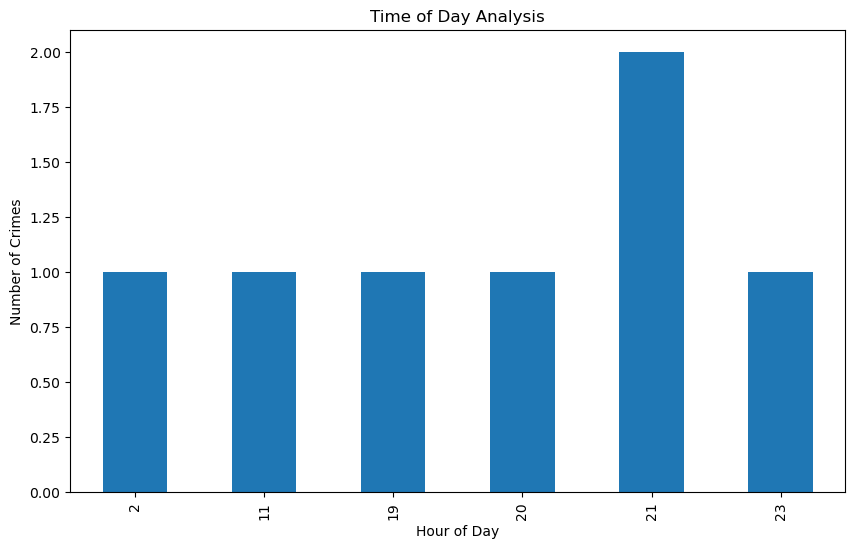

In [16]:
# ----------------------------------------------
# Visualization 5: Time of Day Analysis
# ----------------------------------------------
# Extract hour from 'TIME OCC' column
crime['Hour'] = crime['TIME OCC'] // 100
crime_time_of_day_counts = crime['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
crime_time_of_day_counts.plot(kind='bar')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.title('Time of Day Analysis')
plt.show()

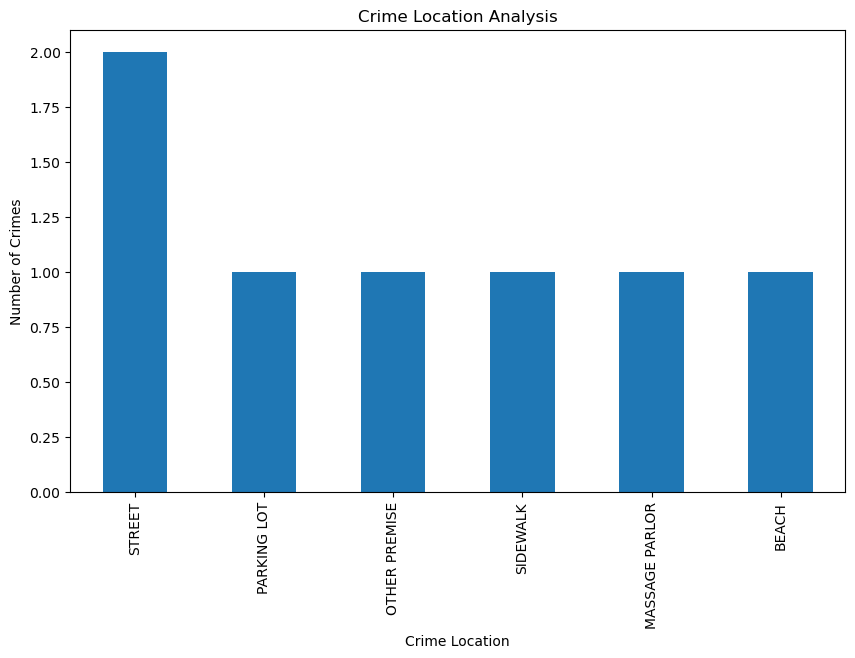

In [17]:
# Crime Location Analysis

crime_location_counts = crime['Premis Desc'].value_counts()
plt.figure(figsize=(10, 6))
crime_location_counts.plot(kind='bar')
plt.xlabel('Crime Location')
plt.ylabel('Number of Crimes')
plt.title('Crime Location Analysis')
plt.show()

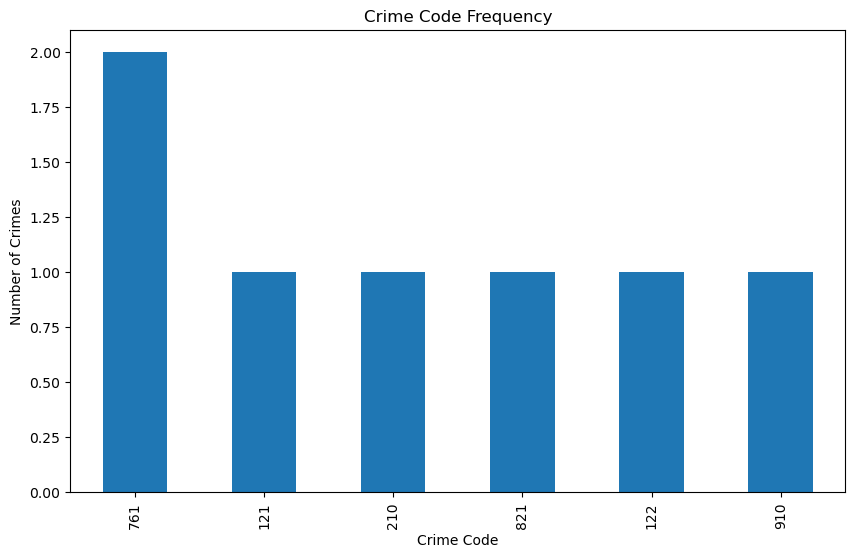

In [18]:
# ----------------------------------------------
# Visualization 10: Crime Code Frequency
# ----------------------------------------------
crime_code_counts = crime['Crm Cd'].value_counts()
plt.figure(figsize=(10, 6))
crime_code_counts.plot(kind='bar')
plt.xlabel('Crime Code')
plt.ylabel('Number of Crimes')
plt.title('Crime Code Frequency')
plt.show()

In [19]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Assuming you have already loaded the 'crime' DataFrame with the relevant data
# Replace 'crime' with your actual DataFrame name

# Drop rows with missing latitude and longitude values
crime_with_location = crime.dropna(subset=['LAT', 'LON'])

# Prepare data for the heatmap
heat_data = [[row['LAT'], row['LON']] for index, row in crime_with_location.iterrows()]

# Create a map centered on Los Angeles
map_LA = folium.Map(location=[34.0522, -118.2437], zoom_start=11)

# Add the heatmap layer to the map
HeatMap(heat_data).add_to(map_LA)

# Display the map
map_LA
